Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

----------------------------------------------------------------------------

# Séance 12 : révisions

La séance 12 est une séance de révisions. Vous pouvez prendre le temps de finir les TD précédents, poser vos questions à vos enseignants. Les corrections des TD précédents sont ici :

https://methnum.gitlab.dsi.universite-paris-saclay.fr/L1/

Les trois exercices suivants formaient l'examen de méthodes numériques de l'an dernier, qui durait 3h avec accès à internet. Ils abordent l'essentiel des notions abordées pendant l'année.

**PLAN :**
- Exercice 1 : trajectoires ballistiques (24 points : boucles, graphiques)
- Exercice 2 : dégénérescence radioactive (15 points : algorithmique, nombres aléatoires, ajustement de paramètres)
- Exercice 3 : primitive d'une fonction (8 points : intégration numérique)
- Qualité du code : 3 points (commentaires, variables avec noms explicites, utilisation de tableaux `numpy` à la place de boucles lorsque c'est pertinent)

## Exercice 1: Trajectoires ballistiques (24 points)

On étudie les trajectoires d'une masse $m$ ponctuelle lancée avec un angle $\alpha$ par rapport à l'horizontale. La masse n'est soumise qu'à son propre poids $\vec{P} = -mg \vec{j}$ où $g = 9.81 \ {\rm m \cdot s^{-2}}$. On localise la masse à l'aide d'un vecteur position $\vec{OM} = x(t) \vec{i} + y(t) \vec{j} $ et $\vec{v} = v_x (t)\vec{i} + v_y(t) \vec{j}$ est son vecteur vitesse. Les coordonnées $x(t)$ (distance de tir) et $y(t)$ (hauteur de tir) sont solutions de l'équation de Newton

$$
\left \{
\begin{array}{rcl}
m \ddot{x}&=& 0 \\ 
m \ddot{y}  &=& - m g  
\end{array} \right .
$$

A l'instant initial $t=0$, on place la masse initiale à l'origine et : $x(0) = y (0) = 0$. Le vecteur vitesse initial vaut $\vec{v} (0) = v_0 \cos \alpha \ \vec{i} + v_0 \cos \alpha \ \vec{j} $ avec $v_0$ connue et $\alpha \in [0,\pi/2]$ radians. **Dans l'exercice, on utilisera systématiquement des radians.** Les équations horaires, solutions de ce problème sont 

$$
\left \{
\begin{array}{rcl}
x(t)& =& (v_0 \cos \alpha) \ t \\
y(t)& = & (v_0 \sin\alpha)\ t - \dfrac{g t^2}{2}
\end{array} \right .
$$

On note  $t_{sol}$, le temps d'impact le temps pour lequel la masse retouche le sol : 
$$y(t_{sol})=0 \Leftrightarrow t_{sol} = \dfrac{2 v_0 \sin \alpha}{g}$$

Dans la cellule suivante, on importe les librairies nécessaires et on fixe $g$, pour toute la suite. **Exécutez la cellule suivante :**

In [1]:
# une fois pour toutes, nous allons charger NumPy et Matplotlib
#
# n'oubliez pas d'évaluer à nouveau cette cellule si vous redémarrez le noyau
#
import numpy as np
import matplotlib.pyplot as plt
g=9.81 # en m.s^(-2)

### a. Tracer la trajectoire 

1. Définir une fonction ```ballistique(alpha, v_0)``` qui prend en argument l'angle $\alpha$ en **radians** et $v_0$ la vitesse initiale en ${\rm m\cdot s^{-1}}$, et affiche 100 points de la trajectoire $(x(t), y(t))$ de la masse $m$ dans le plan $x-y$, de $t=0$ à $t_{sol}$. On soignera la qualité du graphique : titre sur les axes, unités, titre ou légende avec les paramètres de la trajectoire (en degré si possible), etc.
2. On suppose $v_0 = 10 \ {\rm m\cdot s^{-1}}$. Tracer quatre trajectoires pour $\alpha = (10, 20, 30, 45)\times \pi/180$, en appelant 4 fois votre fonction.

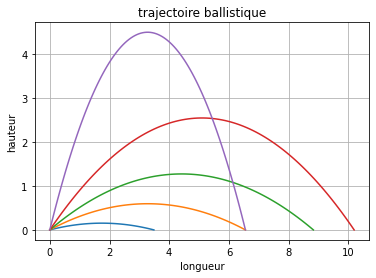

In [2]:
def ballistique(alpha, v_0):
    x = []
    y = []
    t_sol = (2*v_0*np.sin(alpha))/g
    for i in np.linspace(0,t_sol,100):
        x.append(v_0*np.cos(alpha)*i)
        y.append(v_0*np.sin(alpha)*i-((g*pow(i,2))/2))
    plt.plot(x,y)
    plt.title('trajectoire ballistique')
    plt.xlabel('longueur')
    plt.ylabel('hauteur')
    plt.grid(True)
    plt.show

ballistique(10*np.pi/180, 10)
ballistique(20*np.pi/180, 10)
ballistique(30*np.pi/180, 10)
ballistique(45*np.pi/180, 10)
ballistique(70*np.pi/180, 10)

### b. Distance de tir

La balle atteint une certaine distance $x_{sol}$ lorsqu'elle touche le sol au temps $t_{sol}$. 

1. Définir une fonction `distance_tir(alpha, v_0)` qui calcule et retourne la distance de tir $x_{sol}$, avec pour premier argument $\alpha$ et second argument $v_0$.

In [ ]:
def distance_tir(alpha, v_0):
    x = []
    xmax = 0
    t_sol = (2*v_0*np.sin(alpha))/g
    for i in np.linspace(0,t_sol,100):
        x.append(v_0*np.cos(alpha)*i)
    xmax = x[-1]
    return xmax
    
print(distance_tir(10*np.pi/180, 10))
print(distance_tir(20*np.pi/180, 10))
print(distance_tir(30*np.pi/180, 10))
print(distance_tir(45*np.pi/180, 10))
print(distance_tir(70*np.pi/180, 10))

*La cellule suivante teste que vous avez bien répondu à la question en définissant une fonction `distance_tir(alpha, v_0)`. Pour s'en assurer exécutez la cellule, aucun message d'erreur ne doit apparaître.*

In [ ]:
assert 'distance_tir' in globals()
print(distance_tir(np.pi/3, 10))

2. Utiliser cette fonction pour faire un graphe qui montre l'évolution de la distance de tir en fonction de $\alpha \in [0,\pi/2]$ (100 valeurs) pour $v_0 = 10 \ {\rm m\cdot s^{-1}}$. De même, on soignera la qualité du graphique.

In [ ]:
alpha = np.linspace(0,np.pi/2,100)

plt.figure()
plt.plot(alpha,distance_tir(alpha,10),label = 'distance de tir')
plt.title('Distance de tir en fonction de l\'angle alpha')
plt.xlabel('valeur de alpha')
plt.ylabel('distance de tir')
plt.legend()
plt.grid(True)
plt.show()

3. Que vaut la distance de tir maximale pour ce $v_0$? Exécuter votre fonction et donner la réponse à l'aide d'un `print()` bien écrit (phrase, unités, etc.)

In [ ]:
print('La distance maximale de tir est de',max(distance_tir(alpha,10)),'m')

### c. Calcul de l'angle de tir 

On suppose par la suite une balle dont la vitesse initiale vaut $v_0 = 200 \ { \rm m\cdot s^{-1}}$. On souhaite savoir sous quelle angle il faut tirer, pour atteindre une cible placée à distance horizontale $x=L$ de l'origine et à hauteur $y=H$. Premièrement, on remarque qu'un impact ne pourra que se réaliser si $L < \mbox{max} (x_{sol})$. Si cette condition est satisfaite, alors il existe une solution donnée par :

$$
\left \{ \begin{array}{rcl}
L& =& v_0 \cos (\alpha) t_* \\
H & = & v_0 \sin (\alpha) t_* - \dfrac{g t_*^2}{2}
\end{array} \right .
$$

En éliminant le temps d'impact $t_*$ de ce système on trouve une équation algébrique qui définit l'angle de tir $\alpha$ étant donné les paramètres $L$ et $H$. L'égalité suivante doit être satisfaite :

$$
f_{*} ( \alpha,v_0,H,L) = H \cos^2 \alpha - L \sin \alpha \cos \alpha + \dfrac{g L^2}{2 v_0^2} = \dfrac{1}{2} \left ( H + H \cos 2 \alpha - L \sin 2 \alpha + \dfrac{g L^2 }{v_0^2} \right ) = 0
$$

L'équation a été simplifiée utilisant $\cos^2 \alpha = (1+ \cos 2 \alpha)/2$ et $\sin \alpha \cos \alpha = (\sin 2 \alpha )/2$, mais malgré celà, ça ne semble pas si facile de trouver l'angle de tir $\alpha$, solution de cette équation. 

La méthode de Newton est une méthode numérique qui permet de trouver la racine $\alpha$ solution de l'équation en quelques itérations. Cette méthode de Newton a besoin de la dérivée de la fonction $f_{*}$ par rapport à $\alpha$ qui est tout simplement

$$
f'_{*} ( \alpha,v_0,H,L) = - H \sin 2 \alpha - L \cos 2 \alpha 
$$


1. Définir ci dessous les deux fonctions ```f(alpha,v_0,H,L) ``` et ```fprime(alpha,v_0,H,L)``` qui à la réception des arguments $\alpha,v_0,H,L$, **dans cet ordre et avec les unités du problème**,  retournent la valeur de ces fonctions.

In [ ]:
def f(alpha, v_0, H, L):
    p = (1/2)*(H + H*np.cos(2*alpha) - L*np.sin(2*alpha) + ((g*pow(L,2))/(pow(v_0,2))))
    return p

def fprime(alpha, v_0, H, L):
    p_prime = -H * np.sin(2 * alpha) - L * np.cos(2 * alpha)
    return p_prime
    
                                        
print(f(np.pi/10, 200, 10, 200))

In [ ]:
assert 'f' in globals()
assert 'fprime' in globals()

L'algorithme de Newton consiste en l'itération du schéma suivant. Soit $\alpha_0$ une estimation initiale de l'angle de tir. En itérant sur la suite définie par récurrence :

$$
\alpha_{n+1} = \alpha_n - \frac{f  (\alpha_n,v_0,H,L)}{f'(\alpha_{n},v_0,H,L)} \quad, \quad n=0,1,2,\ldots 
$$

on peut trouver l'angle de tir $\alpha_*$ solution de l'équation $f_{*} (\alpha_*,v_0,H,L) = 0$.  

2. Dans la cellule suivante, compléter la fonction `newton(alpha, v_0, H, L, N)` par une boucle qui calcule les N premièrs éléments de la suite $\left\lbrace\alpha_n\right\rbrace$. Stocker et retourner les valeurs de $\alpha$ dans la liste `alpha_list`.

3. On utilisera $\alpha_0 = \pi / 10$ comme première estimation. Pour $v_0 =200 \ {\rm m s^{-1}}$, $H=10 \ {\rm m}$, $L=200 \ {\rm m}$, afficher graphiquement la suite $[\alpha_{0}, \alpha_{1}, \ldots, , \alpha_{10} ]$ en fonction de $n=0,1,\ldots,10$ ($N=10$). 
4. Si votre code numérique est correct, vous devez observer une convergence très rapide de $\alpha_n$ vers l'angle de tir $\alpha_* \approx 0.0745 $ solution du problème. Vérifier ce résultat en affichant le dernier élément de la suite, $\alpha_{10}$.

In [ ]:
def newton(alpha, v_0, H, L, N):
    alpha_list=[]
    alpha_list.append(alpha)
    for i in range(N):
        alpha = alpha - f(alpha,v_0,H,L)/fprime(alpha, v_0, H, L)
        alpha_list.append(alpha)
    plt.figure()
    plt.plot(alpha_list,label = 'alpha')
    plt.title('valeur de alpha pour atteindre la cible')
    plt.xlabel('alpha (en rad)')
    plt.ylabel('nombre de boucle')
    plt.legend()
    plt.grid()
    plt.show
    return alpha_list


print(newton(np.pi/10,200,10,200,10))

In [ ]:
assert 'newton' in globals()

5. Afin de se convaincre que cet angle est correct, afficher graphiquement la trajectoire de la balle pour ce $\alpha_*$, de l'origine jusqu'à la cible. Vous pouvez recycler les instructions de la fonction `ballistique` de la partie a) mais en prenant en considération que la cible sera atteinte au temps $t_* = L /(v_0 \cos \alpha_*)$. Afficher la trajectoire en bleu, et la position de la cible à l'aide d'un markeur 'o'.

In [ ]:
def toucher(alpha, v_0,H,L):
    x = []
    y = []
    t_etoile = L/(v_0*np.cos(alpha))
    for i in np.linspace(0,t_etoile,100):
        x.append(v_0*np.cos(alpha)*i)
        y.append(v_0*np.sin(alpha)*i-((g*pow(i,2))/2))
    plt.plot(x,y,label = 'trajectoire')
    plt.scatter(200,10,marker ='o',s = 300,label ='cible',color = 'y')
    plt.title('trajectoire ballistique')
    plt.xlabel('longueur')
    plt.ylabel('hauteur')
    plt.legend()
    plt.grid(True)
    plt.show
    
    
print(toucher(0.0745,200,10,200))

## Exercice 2: Dégénérescence radio-active (15 points)

Dans cet exercice, on utilise une méthode de Monte-Carlo pour simuler la dégénéresce radio-active d'un ensemble d'atomes. La figure suivante résume l'idée de cette simulation

<img src="monte_carlo_rad.png" width="500">

On démarre à l'instant $t=0$ avec un ensemble de $N$ (ici 9) atomes non dégénérés (points noirs), que l'on représente numériquement par des chiffres 1. On laisse défiler le temps par pas de $\delta $ et à chaque nouvel instant, on calcule quelle est la nouvelle population d'atomes suivant la loi de transition suivante. Chaque atome possède une probabilité faible $\lambda \delta t$ de transiter vers un état dégénéré, et de devenir un 0 (points blancs). Le nombre $\lambda$ s'appelle le taux de décroissance radio-active et il est directement lié au temps de demi-vie. Ainsi, pour la figure de ci-dessus, on observe une évolution  :

$$
\begin{array}{lcl}
t= 0 &, & [1, 1, 1, 1, 1, 1, 1, 1, 1]  \quad \Rightarrow \quad \mbox{N_restant} = 9  \\
t=dt &, & [1, 0, 1, 1, 1, 1, 1, 1, 1] \quad \Rightarrow \quad \mbox{N_restant} = 8 \\
t=2dt&, & [1, 0, 1, 1, 1, 0, 1, 1, 1]\quad \Rightarrow \quad \mbox{N_restant} = 7 \\
t=3dt&, & [1, 0, 1, 0, 1, 0, 1, 1, 0] \quad \Rightarrow \quad  \mbox{N_restant} = 5 \\
\ldots \\
t= \ldots &, & [0, 0, 0, 0, 0, 0, 0, 1, 0] \quad \Rightarrow \quad  \mbox{N_restant} = 1 
\end{array}
$$

dans la simulation numérique. Le but de l'exercice est de faire une fonction qui réalise cette simulation Monte-Carlo. L'algorithme détaillé est écrit ci-dessous :


```
0. définir N le nombre initial d'atomes, lambda le taux de transition, T la durée de la simulation, dt le pas de temps

1. initialiser un vecteur d'état avec N chiffres 1. Ce vecteur contient l'état des N atomes representés par 1 (noir) ou 0 (blanc).

2. ajouter la valeur N à une liste N_restant. Ajouter 0 à une liste temps. Ces deux listes contiendront le nombre d'atomes non-dégénérés restants à instant t et la liste des temps. 

3. pour t de 0 à T par pas de dt
    
     a. pour atome i = 0 a atome i = N-1 inclus
    
          i.  on tire un nombre aléatoire r, uniformément distribué entre 0 et 1
          ii. si r< lambda*dt  
              
              l'atome i du vecteur d'état devient 0 (transition)
                           
     b. on compte le nombre d'atomes non-dégénérés restants, comme la somme 
        du vecteur d'état. Ajouter ce nombre à la liste N_restant. Ajouter également 
        l'instant t actuel à la liste temps.    

4. retourner les listes N_restants et temps. 

```

### a. Fonction qui encode l'algorithme

Copier le programme suivant dans la cellule suivante, et le compléter pour pouvoir réaliser la simulation Monte-Carlo. 

*Rq: à la fin du programme, les tableaux sont convertis sous forme numpy pour pouvoir calculer avec par la suite.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def degen(N, lam, T, dt):
  
    #1. initialiser le vecteur d'état
    etat = ...

    #2. ajouter la valeur N à un tableau N_restant 
    N_restant = []
    N_restant.append(N)
    temps = []
    temps.append(0)

    #3. boucle 
    for ...

        #a. boucle
        for ...
            #i. tirer nombre aleatoire
            ...
            #ii. test
            if ...
            
        
        #b. ajouter le nombre d'atomes restant, le temps 
        N_restant.append(...)
        temps.append(...)
    
    #4. retourner N_restant en fonction du temps, converti en tableau numpy
    temps = np.array(temps)
    N_restant = np.array(N_restant)
    return temps, N_restant

In [ ]:
#LA REPONSE ICI

In [ ]:
assert 'degen' in globals()
print(degen(200, 0, 10, 0.5))

### b. Lancer la simulation et visualisation du résultat

Dans la cellule suivante, exécuter la fonction `degen` pour le jeu de paramètres

$$
N = 100, \quad \lambda=0.01, \quad T=1000, \quad dt = 0.1
$$

Faire un graphique représentant `N_restant` en fonction du temps, et superposer sur le même graphe, la loi théorique :
$$
N_{restants} = N e^{-\lambda t} 
$$

In [ ]:
#LA REPONSE ICI

### c. Ajustement des données

Dans cette section, on ajuste une exponentielle $N \exp (- \lambda t)$ à des données issues de la précédente simulation Monte-Carlo. Si vous n'avez pas réussi la partie précédente, vous pouvez charger les données issues d'une simulation que nous avons faite à l'aide des instructions suivantes à recopier dans une nouvelle cellule :

```
ob=open('data_MC.csv','r')
q=np.loadtxt(ob)
temps=q[:,0]
N_restant=q[:,1]
```
1. Dans la cellule suivante, programmer une fonction ```loi_exp(t,N,lam)``` qui retourne la valeur $N \exp (-\lambda t)$.

In [ ]:
def loi_exp(t,N,lam):
    #LA REPONSE ICI

In [ ]:
assert 'loi_exp' in globals()

2. Ajuster cette fonction sur les données issues de la simulation monte-carlo à l'aide de la méthode [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) vues dans le TD7. Comme estimation initiale des paramètres on utilise $N=100$ et $\lambda=0.01$ qui sont les valeurs utilisées lors de la simulation de Monte-Carlo. Est-ce que le fit trouve des valeurs de $N$ et $\lambda$ proches?

In [ ]:
#LA REPONSE ICI

3. Afficher le fit ensemble avec les données Monte-Carlo.

In [ ]:
#LA REPONSE ICI

# Exercice 3 :  intégration numérique (8 points)

On cherche à calculer la fonction primitive définie par l'intégrale :

$$
F (x) = \int_0^x \frac{\mathrm{d} {x}'}{a {x'}^3 + b x' + c}  
$$

sur l'intervalle $x \in [0,1]$. Ici  $a$, $b$ et $c$ sont trois paramètres réels. On utilisera la méthode des trapèzes pour évaluer cette intégrale. Cette méthode nécessite d'introduire un maillage $ x_i = i / N  \quad, \quad i=0,\ldots,N $ avec $N$ suffisamment grand pour avoir une précision adéquate. On note $f(x_i) = f_i$ et $F (x_i) = F_i$. 

1. Faire une fonction ```prim_cal``` qui, à la réception de $a,b,c,N$ retourne trois tableaux :

- le maillage ```x_tab``` de longueur N+1

$$
x_{tab}=[x_0,x_1,\ldots, x_N]
$$

- l'intégrande ```f_tab```  de longueur N+1

$$
f_{tab}=[f_0,f_1,\ldots, f_N]
$$

- et la fonction primitive ```F_tab``` de longueur N+1

$$
F_{tab}=[F_0,F_1,\ldots, F_N]
$$

Par définition $F_0=0$. Pour calculer les éléments suivant, utiliser la formule des trapèzes vue en séance 8 :

$$
F_i = ...  (\mbox{formule avec les variables    } x_{i-1},x_{i},f_{i-1},f_{i})
$$

pour $i=1,2,...,N$.

In [ ]:
def prim_cal(a, b, c, N):
    #LA REPONSE ICI

In [ ]:
assert 'prim_cal' in globals()

N = 100
x, f, F = prim_cal(1, 1, 1, N)
assert len(x) == N+1
assert len(f) == N+1
assert len(F) == N+1
assert F[0] == 0

In [ ]:
assert 'prim_cal' in globals()

2. Représenter `f_tab` et `F_tab`en fonction de `x_tab`.

In [ ]:
#LA REPONSE ICI

## Qualité du code (3 points)

- Le code est-il bien commenté ? 
- Les variables ont des noms explicites et clairs ? 
- J'utilise `numpy` plutôt que des listes lorsque je fais du calcul sur un vecteur ?